# CIFAR-10 Image Classification Using Convolutional Neural Networks

In [42]:
#checking if everything is already installed
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\kyung\anaconda3\lib\site-packages (2.4.1)


In [14]:
#import statements and check versions
import tensorflow
from  tensorflow import keras
print('TensorFlow version:',tensorflow.__version__)
print('Keras version:',keras.__version__)

TensorFlow version: 2.4.1
Keras version: 2.4.0


# Unpickle Files

In [207]:
import numpy as np

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

#Use this function to split into the features and labels so able to look at sample image for the display stats
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

# Visualize Data

In [208]:
# Use this method to visualize data and images and image statistics 
def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = classes
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)


Stats of batch #1:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 1005
Label Counts of [1](AUTOMOBILE) : 974
Label Counts of [2](BIRD) : 1032
Label Counts of [3](CAT) : 1016
Label Counts of [4](DEER) : 999
Label Counts of [5](DOG) : 937
Label Counts of [6](FROG) : 1030
Label Counts of [7](HORSE) : 1001
Label Counts of [8](SHIP) : 1025
Label Counts of [9](TRUCK) : 981

Example of Image 9000:
Image - Min Value: 15 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 4 Name: deer


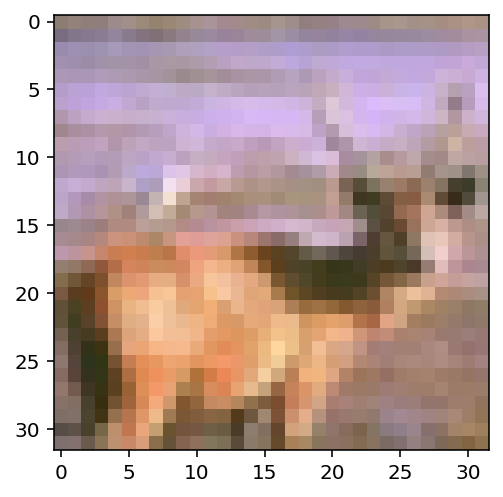

In [217]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
# looking at a sample image and its statistics
sample_id = 9000
display_stats('cifar-10-batches-py', 1, sample_id)


Stats of batch #2:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 984
Label Counts of [1](AUTOMOBILE) : 1007
Label Counts of [2](BIRD) : 1010
Label Counts of [3](CAT) : 995
Label Counts of [4](DEER) : 1010
Label Counts of [5](DOG) : 988
Label Counts of [6](FROG) : 1008
Label Counts of [7](HORSE) : 1026
Label Counts of [8](SHIP) : 987
Label Counts of [9](TRUCK) : 985

Example of Image 9000:
Image - Min Value: 17 Max Value: 223
Image - Shape: (32, 32, 3)
Label - Label Id: 6 Name: frog


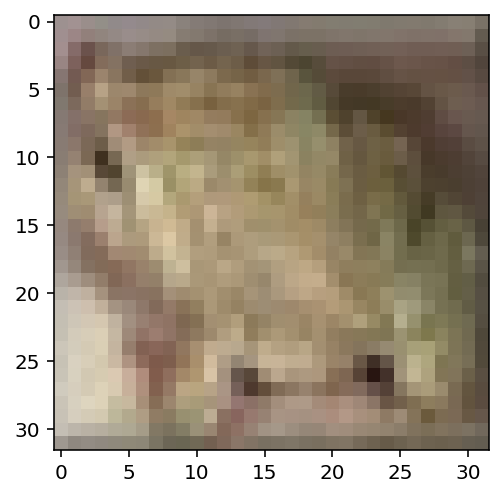

In [218]:
display_stats('cifar-10-batches-py', 2, sample_id)


Stats of batch #3:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 9000:
Image - Min Value: 1 Max Value: 250
Image - Shape: (32, 32, 3)
Label - Label Id: 9 Name: truck


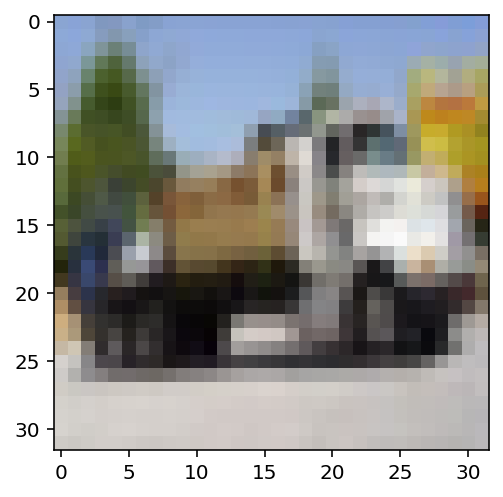

In [219]:
display_stats('cifar-10-batches-py', 3, sample_id)



Stats of batch #4:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 1003
Label Counts of [1](AUTOMOBILE) : 963
Label Counts of [2](BIRD) : 1041
Label Counts of [3](CAT) : 976
Label Counts of [4](DEER) : 1004
Label Counts of [5](DOG) : 1021
Label Counts of [6](FROG) : 1004
Label Counts of [7](HORSE) : 981
Label Counts of [8](SHIP) : 1024
Label Counts of [9](TRUCK) : 983

Example of Image 9000:
Image - Min Value: 25 Max Value: 231
Image - Shape: (32, 32, 3)
Label - Label Id: 6 Name: frog


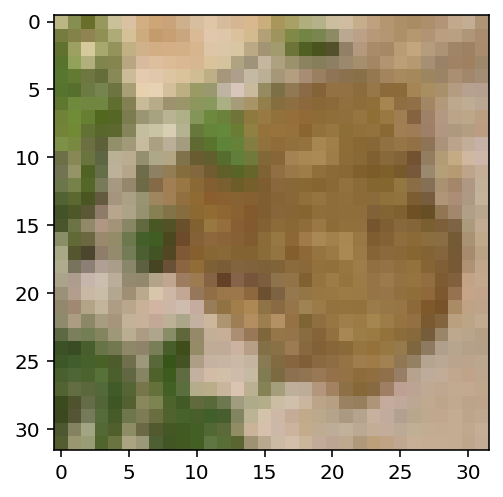

In [220]:
display_stats('cifar-10-batches-py', 4, sample_id)

# unpickling all the data and splitting the data into training and test data

In [212]:
import pickle
import numpy as np
from os import listdir
from os.path import isfile, join
import os

# Function to unpickle the dataset
def unpickle_all_data(directory):
    
    # Initialize the variables
    train = dict()
    test = dict()
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    
    # Iterate through all files that we want, train and test
    # Train is separated into batches
    for filename in listdir(directory):
        if isfile(join(directory, filename)):
            
            # The train data
            if 'data_batch' in filename:
                print('Handing file: %s' % filename)
                
                # Opent the file
                with open(directory + '/' + filename, 'rb') as fo:
                    data = pickle.load(fo, encoding='bytes')

                if 'data' not in train:
                    train['data'] = data[b'data']
                    train['labels'] = np.array(data[b'labels'])
                else:
                    train['data'] = np.concatenate((train['data'], data[b'data']))
                    train['labels'] = np.concatenate((train['labels'], data[b'labels']))
            # The test data
            elif 'test_batch' in filename:
                print('Handing file: %s' % filename)
                
                # Open the file
                with open(directory + '/' + filename, 'rb') as fo:
                    data = pickle.load(fo, encoding='bytes')
                
                test['data'] = data[b'data']
                test['labels'] = data[b'labels']
    
    # Manipulate the data to the propper format
    for image in train['data']:
        train_x.append(np.transpose(np.reshape(image,(3, 32,32)), (1,2,0)))
    train_y = [label for label in train['labels']]
    
    for image in test['data']:
        test_x.append(np.transpose(np.reshape(image,(3, 32,32)), (1,2,0)))
    test_y = [label for label in test['labels']]
    
    # Transform the data to np array format
    train_x = np.array(train_x)
    train_y = np.array(train_y)
    test_x = np.array(test_x)
    test_y = np.array(test_y)
    
    return (train_x, train_y), (test_x, test_y)

# Run the function with and include the folder where the data are
(x_train, y_train), (x_test, y_test) = unpickle_all_data('cifar-10-batches-py/')


Handing file: data_batch_1
Handing file: data_batch_2
Handing file: data_batch_3
Handing file: data_batch_4
Handing file: data_batch_5
Handing file: test_batch


In [213]:
# normalizing data
x_train, x_test = x_train / 255.0, x_test /255.0


In [48]:
classes = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Defining the CNN Model
used a sequential model

In [221]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))


# A dropout layer to randomly drops some nodes and prevent over-fitting
model.add(Dropout(0.2))

# Flatten the feature maps 
model.add(Flatten())

# Generate a fully-cpnnected output layer with a predicted probability for each class

model.add(Dense(64, activation='relu'))

model.add(Dense(10))

# compiling the model now that all the layers are added
model.compile(loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='adam',
               metrics=['accuracy'])

print(model.summary())

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
dropout_32 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 1024)            

# Training the model
Doing this for 10 epochs

In [215]:
num_epochs = 10

history = model.fit(x_train, y_train, epochs = num_epochs, 
                    validation_data=(x_test, y_test))



Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.7797 - accuracy: 0.3397 - val_loss: 1.2699 - val_accuracy: 0.5420
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2344 - accuracy: 0.5610 - val_loss: 1.0739 - val_accuracy: 0.6177
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0735 - accuracy: 0.6193 - val_loss: 1.0029 - val_accuracy: 0.6517
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9702 - accuracy: 0.6599 - val_loss: 0.9823 - val_accuracy: 0.6589
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8945 - accuracy: 0.6837 - val_loss: 0.8817 - val_accuracy: 0.6921
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8427 - accuracy: 0.7035 - val_loss: 0.9017 - val_accuracy: 0.6839
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7965 - accuracy: 0.7210 - val_loss: 0.8698 -

# Evaluating the loss function and accuracy of the model

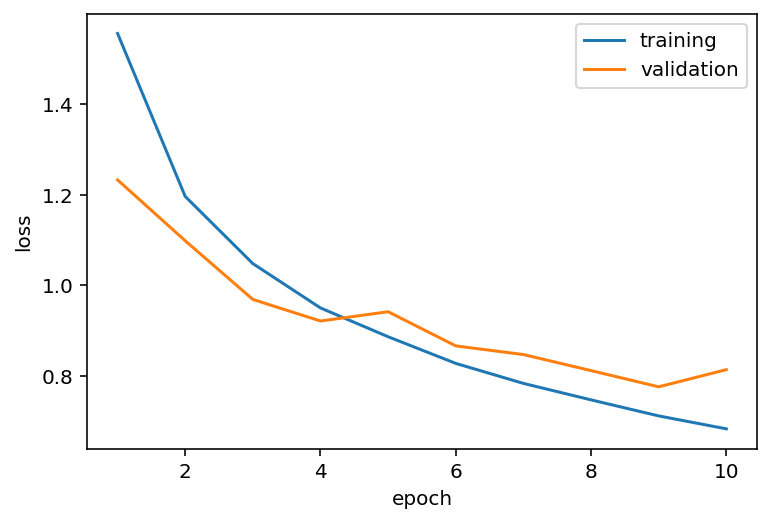

313/313 - 3s - loss: 0.8130 - accuracy: 0.7213


In [89]:
%matplotlib inline
from matplotlib import pyplot as plt
num_epochs = 10
epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

# Saving the model!

In [201]:
# Save the trained model
modelFileName = 'models/cifar_classifier.h5'
model.save(modelFileName)
# del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/cifar_classifier.h5
